# Introduction to neural network classification with 

In this notebook we're going to learn how to write neural networks for classification problems

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)

In [2]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


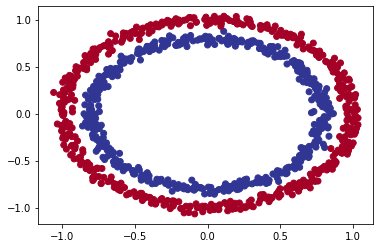

In [5]:
# Visualize with the plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [8]:
# View the first examples of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate..

In [9]:
import tensorflow as tf

In [10]:
X_train, X_test, y_train, y_test = X[:800], X[800:], y[:800], y[800:]

In [11]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(7, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model.fit(X_train, 
                    y_train, 
                    epochs=200)

Epoch 1/200
25/25 [==============================] - 3s 9ms/step - loss: 0.6974 - accuracy: 0.4812
Epoch 2/200
25/25 [==============================] - 0s 12ms/step - loss: 0.6959 - accuracy: 0.4750
Epoch 3/200
25/25 [==============================] - 0s 8ms/step - loss: 0.6949 - accuracy: 0.4725
Epoch 4/200
25/25 [==============================] - 0s 8ms/step - loss: 0.6942 - accuracy: 0.4875
Epoch 5/200
25/25 [==============================] - 0s 9ms/step - loss: 0.6935 - accuracy: 0.4787
Epoch 6/200
25/25 [==============================] - 0s 9ms/step - loss: 0.6930 - accuracy: 0.4938
Epoch 7/200
25/25 [==============================] - 0s 9ms/step - loss: 0.6922 - accuracy: 0.5100
Epoch 8/200
25/25 [==============================] - 0s 11ms/step - loss: 0.6919 - accuracy: 0.5163
Epoch 9/200
25/25 [==============================] - 0s 8ms/step - loss: 0.6912 - accuracy: 0.5238
Epoch 10/200
25/25 [==============================] - 0s 13ms/step - loss: 0.6907 - accuracy: 0.5213
Epoch 

In [12]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 1s 5ms/step - loss: 0.1260 - accuracy: 0.9850


[0.12604770064353943, 0.9850000143051147]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might want to add mroe layres or increase the number of hidden units within a layer
2. Compiling a model - here we might choose a different optimization function such as Adam instead of SGD
3. Fitting a model - perhaps we might fit our model for more epochs

In [13]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(tf.constant(X, dtype=tf.float32), 
            tf.constant(y, dtype=tf.float32),
            epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 0.6930 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6894 - accuracy: 0.4980
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6870 - accuracy: 0.5020
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6680 - accuracy: 0.6790
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6580 - accuracy: 0.6650
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.7600
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6242 - accuracy: 0.7100
Epoch 11/

To visualize our model's predictions, let's create a function `plot_decision_boundary()` this function will:

* Take in a trained model, features and labels
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [14]:
import numpy as np
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """

  # define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multiclass
  if len(y_pred[0]) > 1:
    print("doing multi-class classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


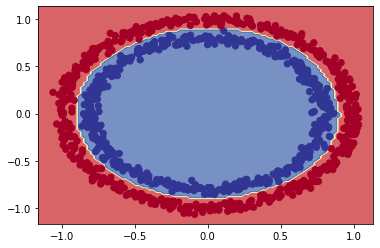

In [15]:
# Check out the predictions our model is making
plot_decision_boundary(model_2, X, y)

## The missing piece - non linearity

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 4.3302 - accuracy: 0.4510
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2710 - accuracy: 0.4530
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2266 - accuracy: 0.4560
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1931 - accuracy: 0.4600
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1925 - accuracy: 0.4610
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1920 - accuracy: 0.4610
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1835 - accuracy: 0.4610
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1804 - accuracy: 0.4600
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1798 - accuracy: 0.4600
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1720 - accuracy: 0.4610
Epoch 11/

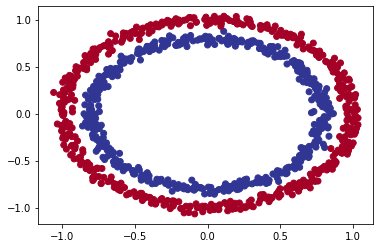

In [17]:
# Check out data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 3ms/step
doing binary classification


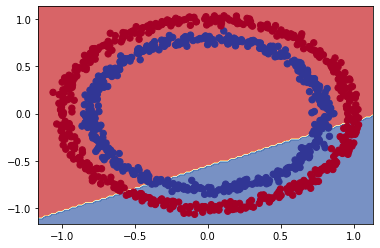

In [18]:
# Check the decision boundary for our model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's build our first neural network with a non linear activation function

In [19]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_5.fit(tf.constant(X, dtype=tf.float32),
            tf.constant(y, dtype=tf.float32),
            epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3328 - accuracy: 0.4530
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2807 - accuracy: 0.4540
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1600 - accuracy: 0.4600
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1206 - accuracy: 0.4630
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0884 - accuracy: 0.4630
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0611 - accuracy: 0.4650
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9861 - accuracy: 0.4700
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8994 - accuracy: 0.4690
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8687 - accuracy: 0.4700
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8153 - accuracy: 0.4700
Epoch 11/

In [20]:
#  Time to replicate the multi-layer neural network from tensorflow playground in code

# Set random seed
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history = model_6.fit(tf.constant(X, dtype=tf.float32),
                      tf.constant(y, dtype=tf.float32),
                      epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


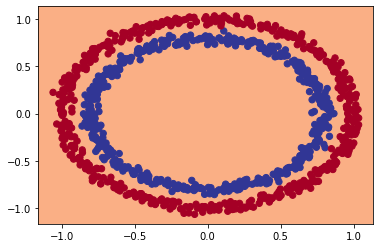

In [21]:
plot_decision_boundary(model_6, X, y)

In [22]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(9, activation="relu"),
    tf.keras.layers.Dense(7, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Create callback
callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=10)

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history = model_7.fit(tf.constant(X, dtype=tf.float32),
                      tf.constant(y, dtype=tf.float32),
                      callbacks=[callback],
                      epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6874 - accuracy: 0.5050
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5180
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.5180
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.5310
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.5330
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6676 - accuracy: 0.5370
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.5850
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.5910
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.6450
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.6590
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


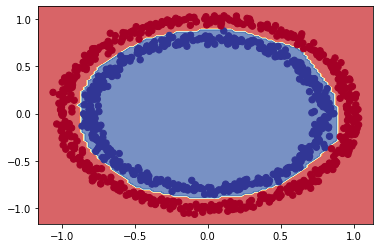

In [23]:
plot_decision_boundary(model_7, X, y)

In [24]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 1.0000


[0.010475538671016693, 1.0]

Now we've discussed the concept of linear and non-linear functions, let's see them in action

In [25]:
# Create a toy tensor (simnilar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

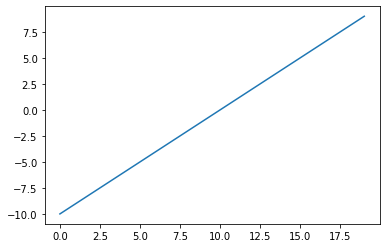

In [26]:
# Visualize our toy tensor
plt.plot(A);

In [27]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [28]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

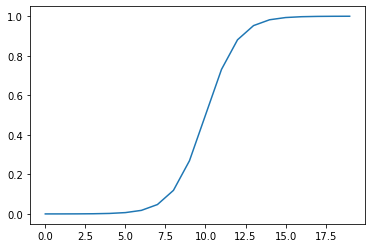

In [29]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [30]:
# Replicate relu activation function
def relu(x):
  return tf.maximum(0, x)

In [31]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

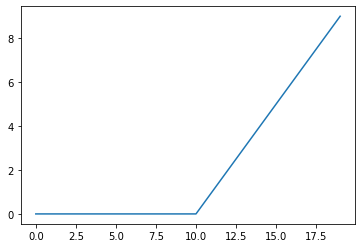

In [32]:
# Lets plot A passed through relu function
plt.plot(relu(A));

In [33]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

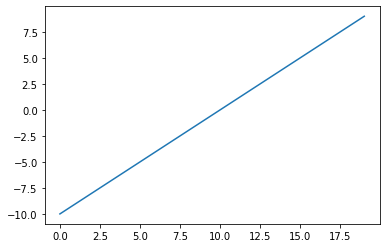

In [34]:
plt.plot(tf.keras.activations.linear(A));

In [35]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification problem

So far we've been training and testing on teh same dataset

However, in machine learning this is basically a sin

So let's create a training and test set

In [36]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [37]:
# Let's recreate a model to fit on the training data and evaluate on the test set

# Set random seed
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(9, activation="relu"),
    tf.keras.layers.Dense(7, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Create callback
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10)

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history = model_8.fit(tf.constant(X_train, dtype=tf.float32),
                      tf.constant(y_train, dtype=tf.float32),
                      callbacks=[callback],
                      epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6902 - accuracy: 0.5075
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5213
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5150
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5188
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.5325
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.5400
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.5387
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5450
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.5612
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6798 - accuracy: 0.5500
Epoch 11/

In [38]:
# Evaluate on training data
model_8.evaluate(X_train, y_train)

25/25 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 1.0000


[0.006708471570163965, 1.0]

In [39]:
# Evaluate on test data
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 1.0000


[0.011432659812271595, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classification


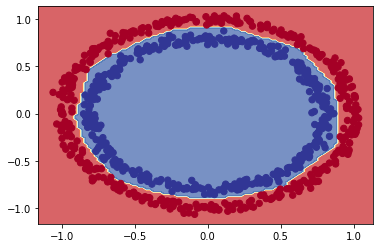

In [40]:
# Plot the decision boundaries for training set
plot_decision_boundary(model_8, 
                       X_train,
                       y_train)

313/313 [==============================] - 0s 1ms/step
doing binary classification


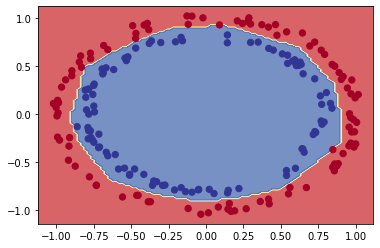

In [41]:
# Plot the decision boundaries for test set
plot_decision_boundary(model_8, 
                       X_test,
                       y_test)

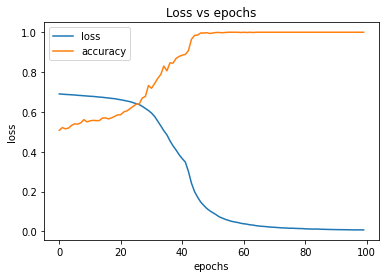

In [42]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss vs epochs")
plt.legend();

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality you can add to your model *while* its training
* Another model (we could use the same one as above, but we're practicing building models here.
* A modified loss curves plot

In [43]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(9, activation="relu"),
    tf.keras.layers.Dense(7, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10)

# Fit the model
history = model_9.fit(tf.constant(X_train, dtype=tf.float32),
                      tf.constant(y_train, dtype=tf.float32),
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 3ms/step - loss: 0.6909 - accuracy: 0.5025 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.4938 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.4963 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5200 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5288 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

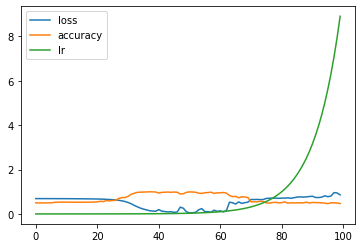

In [44]:
pd.DataFrame(history.history).plot()
plt.legend()

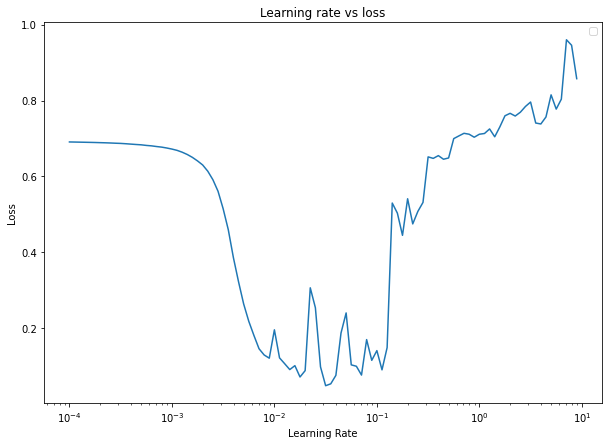

In [45]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/ 20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")
plt.legend();

In [46]:
# Let's try using a higher *ideal* learning rate with the same model

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(9, activation="relu"),
    tf.keras.layers.Dense(7, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.4688
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4812
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5275
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.4900
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5000
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5263
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5300
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5113
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5138
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5150
Epoch 11/

313/313 [==============================] - 1s 3ms/step
doing binary classification


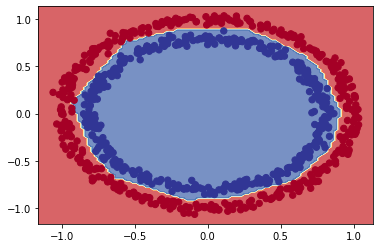

In [47]:
plot_decision_boundary(model_10, X_train, y_train)

313/313 [==============================] - 0s 1ms/step
doing binary classification


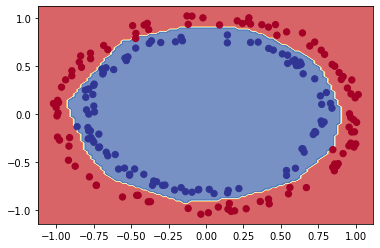

In [48]:
plot_decision_boundary(model_10, X_test, y_test)

In [49]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 0.9950


[0.01169817429035902, 0.9950000047683716]

## More classification evaluation methods

Alongside visualizing our models results there are a handful of other classification evaluation methods and metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion-matrix
* Classification report (from scikit-learn)

In [50]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy * 100):.2f}")

7/7 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9950
Model loss on the test set: 0.01169817429035902
Model accuracy on the test set: 99.50


Confusion matrix

In [51]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test) # in prediction probability form

# Create confusion matrix
# confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


Prediction array has come out in **prediction probability** form.. the standard ouput from the sigmoid (or softmax) activation functions

In [52]:
# Convert our prediction probabilities to binary format and view first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [53]:
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  0,  99]])

Prettifying our confusion matrix

In [35]:
# Note: the confusion matrix code we're about to write a remix of scikit-learn function and our code

import itertools
from sklearn.metrics import confusion_matrix

def create_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

    # Create the consufion matrix
    cm = confusion_matrix(y_true, tf.round(y_pred))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
    n_classes = cm.shape[0]

    # Let's prettify it 
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)

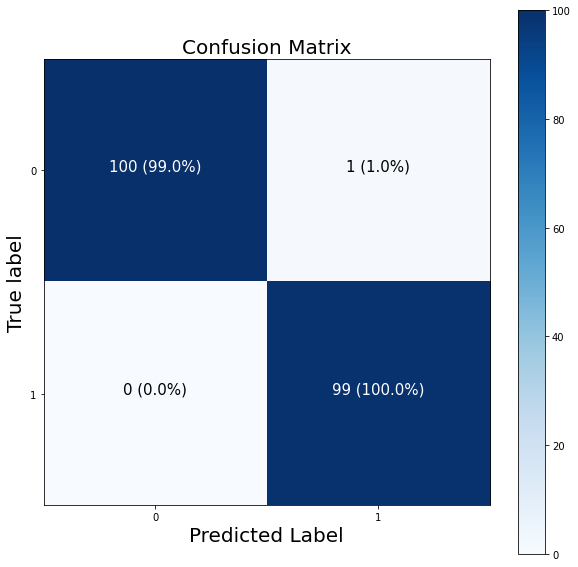

In [61]:
plot_confusion_matrix(y_test, y_preds)

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have more than 2 different classes it is a multi-class classification

To practice multi-class classification, we're going to build a neural network to classify imafes of different items of clothing.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [3]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

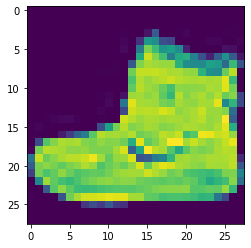

In [4]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [5]:
# Check out samples label
train_labels[0]

9

In [6]:
# Create a small list so we can index on our training labels
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

Text(0.5, 1.0, 'T-shirt/top')

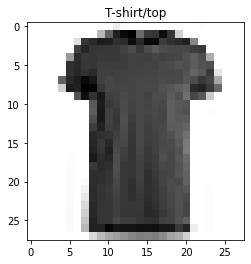

In [7]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

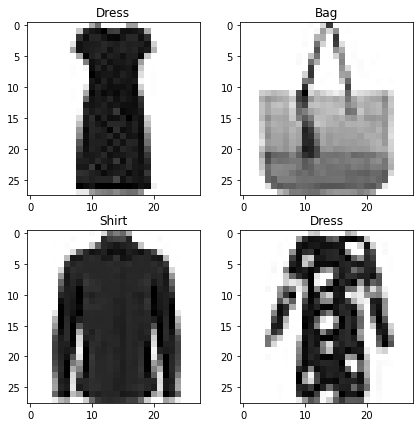

In [8]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(test_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])

## Building a multi-class classification model

For our multi-class classification model, we can use a somilar architecture to our binary classifiers, however we're going to tweak a few things:
* Input_shape = 28 x 28 (the shape of one image)
* Output_shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded use CategoricalCrossentropy()
  * If your labela are not one-hot encoded use SparseCategoricalCrossentropy()
* Output layer activation = Sotfmax (not sigmoid)

In [9]:
# Set random seed
tf.random.set_seed(42)

# Our data needs to be flattened (from 28*28 to 784)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 18s 6ms/step - loss: 2.2557 - accuracy: 0.1423 - val_loss: 2.0520 - val_accuracy: 0.1962
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.9290 - accuracy: 0.1945 - val_loss: 1.8862 - val_accuracy: 0.1990
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8482 - accuracy: 0.2002 - val_loss: 1.8387 - val_accuracy: 0.2003
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8224 - accuracy: 0.2044 - val_loss: 1.8123 - val_accuracy: 0.2103
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7709 - accuracy: 0.2380 - val_loss: 1.7097 - val_accuracy: 0.2706
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6450 - accuracy: 0.2885 - val_loss: 1.6160 - val_accuracy: 0.3032
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5973 - accuracy: 0.2952 - val_loss: 1.5770 - val_accurac

In [10]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scales (or normalized), this means they like to have the numbers in the tensors between 0 & 1

In [11]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_norm_data = model_12.fit(train_data_norm,
                                 train_labels,
                                 epochs=10,
                                 validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0880 - accuracy: 0.5860 - val_loss: 0.7618 - val_accuracy: 0.7227
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6847 - accuracy: 0.7584 - val_loss: 0.6831 - val_accuracy: 0.7591
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6228 - accuracy: 0.7799 - val_loss: 0.6330 - val_accuracy: 0.7776
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5940 - accuracy: 0.7916 - val_loss: 0.6135 - val_accuracy: 0.7864
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5789 - accuracy: 0.7965 - val_loss: 0.6161 - val_accuracy: 0.7869
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5699 - accuracy: 0.7999 - val_loss: 0.6266 - val_accuracy: 0.7817
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5635 - accuracy: 0.8025 - val_loss: 0.6053 - val_accuracy:

**Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1)

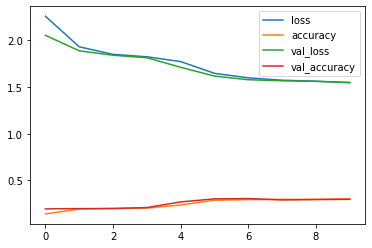

In [13]:
# Plot non-normalized data loss curve
import pandas as pd

pd.DataFrame(non_norm_history.history).plot();

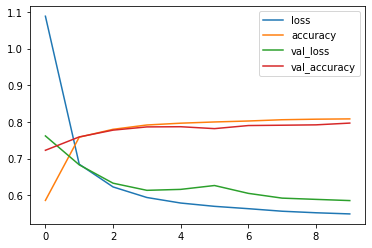

In [14]:
# Plot normalized data loss curve
pd.DataFrame(history_norm_data.history).plot();

## Finding the ideal learning rate

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history_13 = model_13.fit(train_data_norm,
                          train_labels,
                          epochs=40,
                          validation_data=(test_data_norm, test_labels),
                          callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 11s 4ms/step - loss: 1.1045 - accuracy: 0.6214 - val_loss: 0.8438 - val_accuracy: 0.7196 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7445 - accuracy: 0.7616 - val_loss: 0.7163 - val_accuracy: 0.7698 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6618 - accuracy: 0.7858 - val_loss: 0.6547 - val_accuracy: 0.7862 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6202 - accuracy: 0.7977 - val_loss: 0.6436 - val_accuracy: 0.7847 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5963 - accuracy: 0.8042 - val_loss: 0.6284 - val_accuracy: 0.7948 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5820 - accuracy: 0.8082 - val_loss: 0.6489 - val_accuracy: 0.7791 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 1

Text(0.5, 1.0, 'Finding the ideal learning rate')

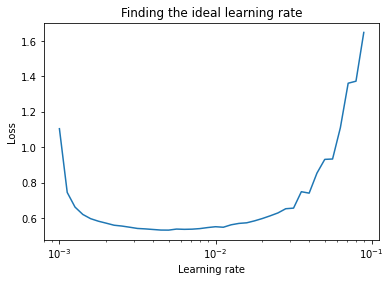

In [17]:
# Plot learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * 10**(tf.range(40)/20)
plt.semilogx(lrs, history_13.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [18]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
             train_labels,
             epochs=20,
             validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 1.4425 - accuracy: 0.4819 - val_loss: 1.0550 - val_accuracy: 0.6216
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9122 - accuracy: 0.6662 - val_loss: 0.8584 - val_accuracy: 0.6789
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7689 - accuracy: 0.7057 - val_loss: 0.7672 - val_accuracy: 0.7065
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7230 - accuracy: 0.7213 - val_loss: 0.7460 - val_accuracy: 0.7251
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6971 - accuracy: 0.7375 - val_loss: 0.7243 - val_accuracy: 0.7368
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6657 - accuracy: 0.7700 - val_loss: 0.7098 - val_accuracy: 0.7538
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6362 - accuracy: 0.7837 - val_loss: 0.6625 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

In [27]:
# Create a confusion matrix
y_probs = model_14.predict(test_data_norm)
y_preds = y_probs.argmax(axis=1)
y_preds

313/313 [==============================] - 0s 1ms/step


array([9, 2, 1, ..., 8, 1, 5])

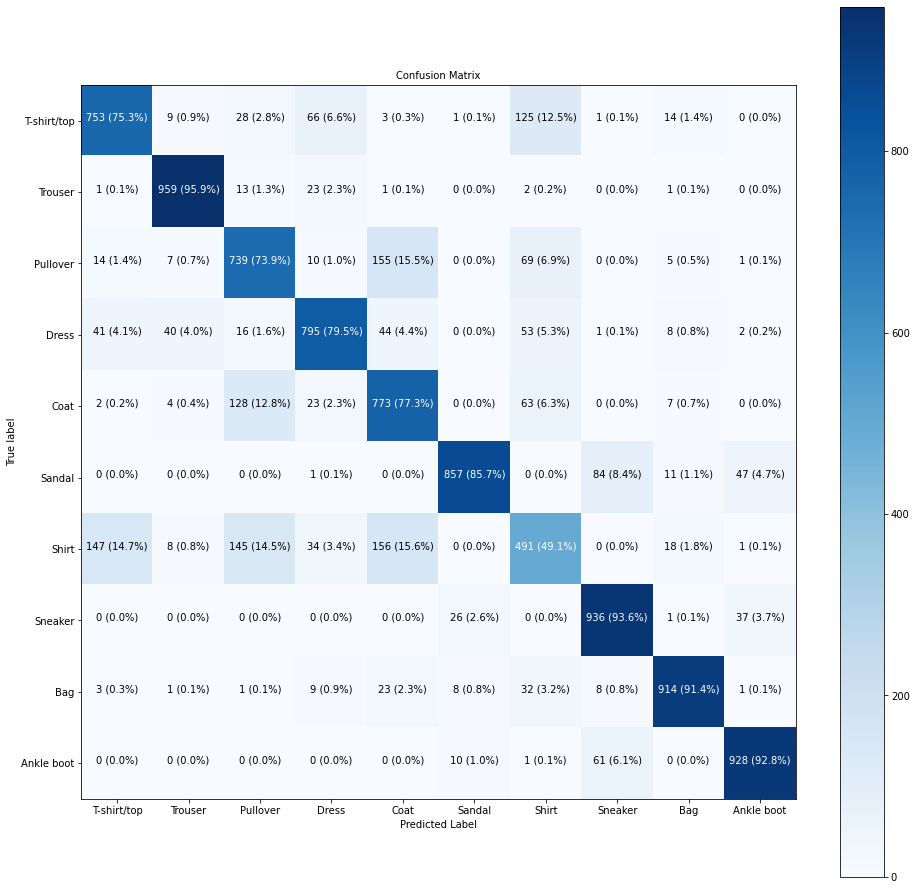

In [36]:
create_confusion_matrix(y_true=test_labels, 
                        y_pred=y_preds, 
                        classes=class_names, 
                        figsize=(16, 16),
                        text_size=10)

How about we create a function for:
* Plotting a random image
* Making a prediction on said image
* Labelling the plot with the truth label & predicted label

In [64]:
import random

def plot_random_image(model, images, true_labels, classes):
  random_index = random.randint(0, len(images))
  true_label = true_labels[random_index]

  prediction = model.predict(images[random_index]);
  pred_prob = np.max(prediction)
  predicted_label = np.argmax(prediction)

  plt.imshow(images[random_index], cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.title(f"Predicted: {classes[predicted_label]} {(pred_prob * 100):.2f}%", 
            c="g" if predicted_label == true_label else "r",
            fontsize=12)
  plt.xlabel("Actual: " + classes[true_label], fontsize=12)

1/1 [==============================] - 0s 29ms/step


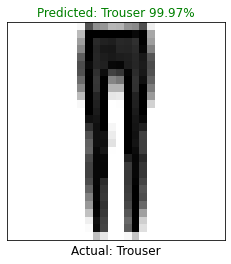

In [65]:
plot_random_image(model_14, test_data_norm, test_labels, class_names)

# What patterns is our model learning?

In [71]:
# Find the layers of our most recent model
model_14.layers

In [72]:
# Extract a particular layer
model_14.layers[1]

In [74]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.5393315 ,  0.6387018 , -0.72554606, -0.2769289 ],
        [ 0.5373454 ,  0.14481641, -0.8502281 ,  0.36145017],
        [ 0.44290447,  0.75145835, -0.7625728 , -1.1152177 ],
        ...,
        [ 0.5193414 ,  0.03371392,  0.08679642,  0.38106287],
        [ 0.22996987, -0.3247444 ,  0.03316871,  0.4802344 ],
        [ 0.13876633,  0.5853636 , -0.09716391,  0.2920863 ]],
       dtype=float32), (784, 4))

In [75]:
model_14.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


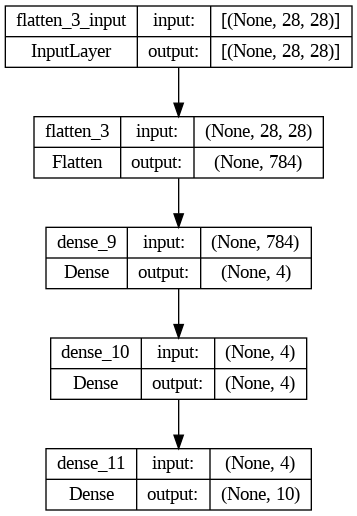

In [76]:
# Let's check out another way of viewing deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)